Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

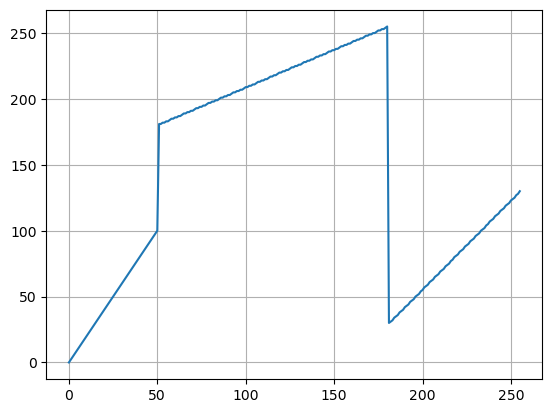

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
img_orig = cv.imread('images\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)


# Enhancing grey matter using intensiy transformations Assuming intensity ranges from 50 to 180 are responsible for the grey matter

c= np.array([(0,50),(150,100),(180,255)])
arr1 = np.linspace(0,c[1,1],c[0,1]+1).astype("uint8")

arr2 = np.linspace(c[2,0]+1,c[2,1],c[2,0]-c[0,1]).astype("uint8")

arr3 = np.linspace(c[0,1]-20,c[2,0]-c[0,1],255-c[2,0]).astype("uint8")


gray_matter_transformation = np.concatenate((arr1,arr2),axis=0).astype("uint8")
gray_matter_transformation = np.concatenate((gray_matter_transformation,arr3),axis=0).astype("uint8")

fig,ax = plt.subplots()
ax.plot(gray_matter_transformation)
plt.savefig('gray_matter_transformation.png')
ax.grid()
plt.show()


# Apply the transformations to the original image

img_gray_matter = cv.LUT(img_orig,gray_matter_transformation)




256


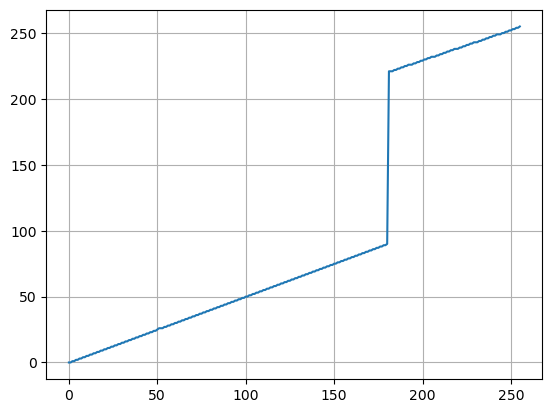

In [37]:
# Enhancing white matter using intensiy transformations. Assuming intensity ranges from 180 to 255 are responsible for the white matter

c= np.array([(50,25),(50,90),(180,220),(255,255)])
arr1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")

arr2 = np.linspace(c[0,1]+1,c[1,1],c[2,0]-c[1,0]).astype("uint8")

arr3 = np.linspace(c[2,1]+1,255,255-c[2,0]).astype("uint8")


 
white_matter_transformation = np.concatenate((arr1,arr2),axis=0).astype("uint8")
white_matter_transformation= np.concatenate((white_matter_transformation,arr3),axis=0).astype("uint8")

print(len(white_matter_transformation))

fig,ax = plt.subplots()
ax.plot(white_matter_transformation)
plt.savefig('white_matter_transformation.png')
ax.grid()
plt.show()


# Apply the transformations to the original image
img_white_matter = cv.LUT(img_orig,white_matter_transformation)


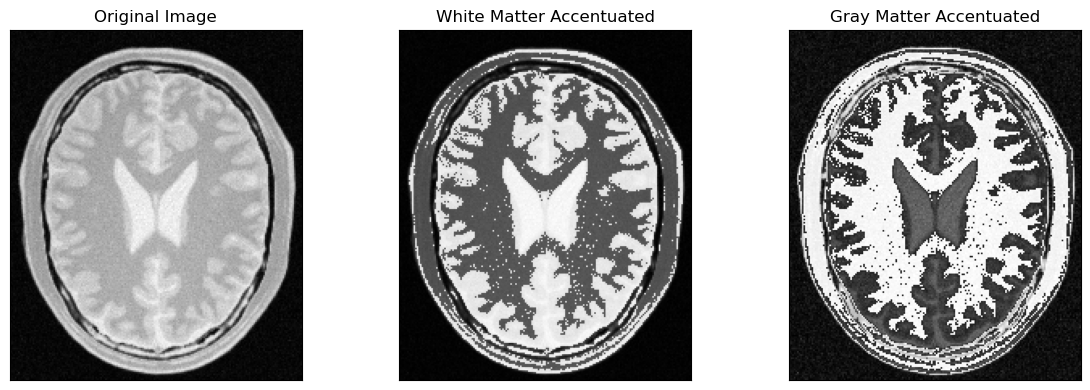

In [38]:


# Display the original image and the transformed images
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(img_orig, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_white_matter, cmap='gray')
plt.title("White Matter Accentuated"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_gray_matter, cmap='gray')
plt.title("Gray Matter Accentuated"), plt.xticks([]), plt.yticks([])
plt.savefig('Display_Enhanced_image.png')
plt.tight_layout()
plt.show()

